In [ ]:
Example queries

# maximum amount of delays ordered by month

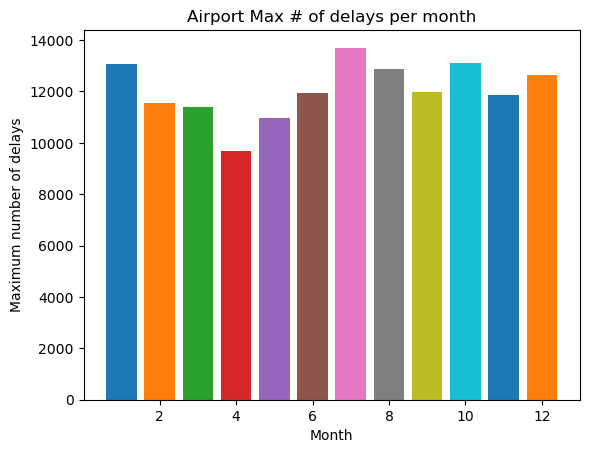

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

FILEPATH = "https://corgis-edu.github.io/corgis/datasets/csv/airlines/airlines.csv"

df = pd.read_csv(FILEPATH)

rows, columns = df.shape

new_column = (
    df["Statistics.# of Delays.National Aviation System"]
    .add(df["Statistics.# of Delays.Carrier"])
    .add(df["Statistics.# of Delays.Late Aircraft"])
    .add(df["Statistics.# of Delays.Security"])
    .add(df["Statistics.# of Delays.Weather"])
)

maxes = []

df.insert(columns, "SumDelays", new_column, True)

df["Time.Label"] = pd.to_datetime(df["Time.Label"])

for i in range(1, 13):
    filtered_months = df[['Airport.Code', 'Airport.Name', 'Time.Label', 'SumDelays']][df['Time.Label'].dt.month == i]
    max_delays = filtered_months['SumDelays'].max()
    plt.bar(i, max_delays)
    maxes.append(max_delays)

# filtered_months = df[['Airport.Code', 'Airport.Name', 'Time.Label', 'SumDelays']]

# filtered_months[['Airport.Code', 'Airport.Name', 'SumDelays']][filtered_months.SumDelays > 7500]

vertical_ticks = np.linspace(0, np.average(maxes), 25).tolist().extend([max(maxes)])

plt.ylabel("Maximum number of delays")
plt.xlabel("Month")
plt.yticks(vertical_ticks)
plt.title("Airport Max # of delays per month")

plt.show()

